# Deploying Machine Learning On Reddit #

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')

top_scores = pd.read_csv('./datasets/top_scores.csv')

BNB = top_scores[top_scores['Model_Name']=='BernoullilNB']
MNB = top_scores[top_scores['Model_Name']=='MultinomialNB']
SVM = top_scores[top_scores['Model_Name']=='SVM']

## Executive Summary ##

For this Project, I was most interested in Time. Specifically, how does time affect my data on reddit? Reddit is a unique place to get data because it is constantly generating data. At any given moment, people are interacting with the site, posting things. Every time I scraped data, it was like a snapshot in time of reddit. Just like how a movie is just a series of still pictures , show in quick succession, My hope was that I could build a machine that could track that movement over time using the snapshots I scraped. Hopefully, by looking at how those snapshots moved, I could lean something about the Data, but also the Models.

## Web Scraping Reddit ##

My first challenge was to scrape Reddit. I build a web-scraper that flipped the pages of reddit by “clicking” the next button. However, this method was inconsistent; the most reddit pages I ever successfully scraped was 40 (1,000 posts). Generally, it could only scrape ~20 pages(500 posts). I don’t think this was a problem, in fact I think that by only scraping ~500 top posts, I was narrowing the focus of my predictive power, and filtering out the noise in the lower ranked posts. 

## Processing the Data ##

When I processed the Data, I had to make some decisions about what Features I would use. I decided to limit the features as little as possible, so see how well the models could learn without a human helping them along. This would become a problem later on, but at the time, I didn't think at the time that having a lot of features(>10,000) would put too much of a strain on processing power.

Text(0,0.5,u'# of Features')

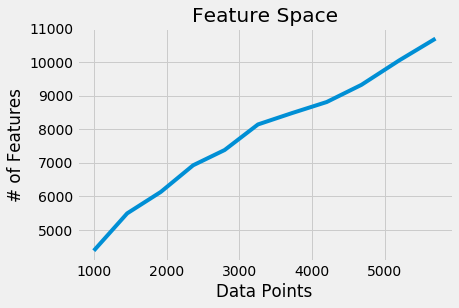

In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
BNB.plot(x='Train_rows', y='Features', legend=False)
plt.title('Feature Space')
plt.xlabel('Data Points')
plt.ylabel('# of Features')

## Modeling ##

I selected a MultinomialNB, BernoulliNB and SCV as my models to fit. I selected them because they are all classifiers, and unlike the Random Forest, they input all the features. I thought this was important because I assumed ‘time’ was going to be my most important feature. In fact, I didn’t think that my data would make sense without that feature, as identical posts could have different targets. Additional note, I scaled my ‘time’ column with a MinMaxScaler, rather than the StandardScaler, because I didn’t want time points as a negative.

## My First LEARNER & reddit_LEARNER ##

Ultimately I built a pipeline that will scrape top posts from reddit, turn that into my test set, build a model based upon a prior train set, scored against the test, and then saves the scores (And the Model if it has the highest score). Finally, it concats my train set with my test set to create a super train set for the next scrape. I then deployed all my scripts into the reddit_LEARNER foulder and wrote some .py files to see if I could get my machine to run from the terminal, as opposed to a jupyter notebook. My reddit_LEARNER managed to get through 13 iterations before the feature space and data got too large for my computer to process. Below is the metadata from those tests.

In [12]:
top_scores

,Model_Name,Score,True_Baseline,Train_baseline,Test_rows,Train_rows,Features,Best_params
0,BernoullilNB,0.588235,49.828650,50.000000,459.0,1000.0,4381.0,{'alpha': 0.00013436461523494455}
1,MultinomialNB,0.588235,49.828650,50.000000,459.0,1000.0,4381.0,{'alpha': 0.9421231975783434}
2,SVM,0.644880,49.828650,50.000000,459.0,1000.0,4381.0,{'C': 0.10626772975239612}
3,BernoullilNB,0.634199,49.661635,49.828650,462.0,1459.0,5493.0,{'alpha': 0.29680516020712405}
4,MultinomialNB,0.601732,49.661635,49.828650,462.0,1459.0,5493.0,{'alpha': 0.29680516020712405}
5,SVM,0.718615,49.661635,49.828650,462.0,1459.0,5493.0,{'C': 0.2016380229055936}
6,BernoullilNB,0.568539,49.788673,49.661635,445.0,1921.0,6131.0,{'alpha': 0.9583088483807847}
7,MultinomialNB,0.546067,49.788673,49.661635,445.0,1921.0,6131.0,{'alpha': 0.9583088483807847}
8,SVM,0.741573,49.788673,49.661635,445.0,1921.0,6131.0,{'C': 0.33394077625904706}
9,BernoullilNB,0.586605,49.946409,49.788673,433.0,2366.0,6925.0,{'alpha': 0.9583088483807847}


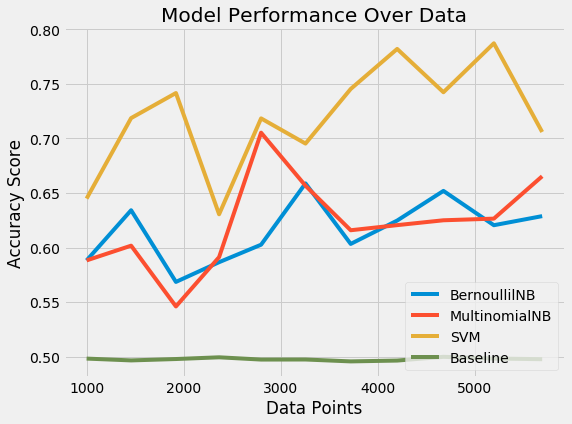

In [7]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.plot(BNB.Train_rows, BNB.Score, label='BernoullilNB')
plt.plot(MNB.Train_rows, MNB.Score, label='MultinomialNB')
plt.plot(SVM.Train_rows, SVM.Score, label='SVM')
plt.plot(SVM.Train_rows, (SVM.True_Baseline/100), label='Baseline')
plt.title('Model Performance Over Data')
plt.xlabel('Data Points')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()

Text(0,0.5,u'Accuracy Score')

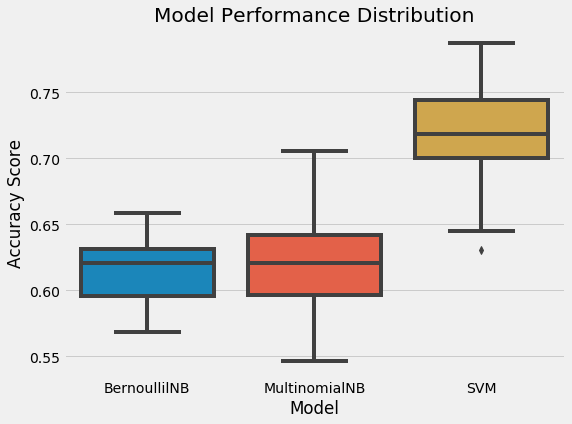

In [8]:
sns.boxplot(x=top_scores['Model_Name'], y=top_scores['Score'])
plt.title('Model Performance Distribution')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

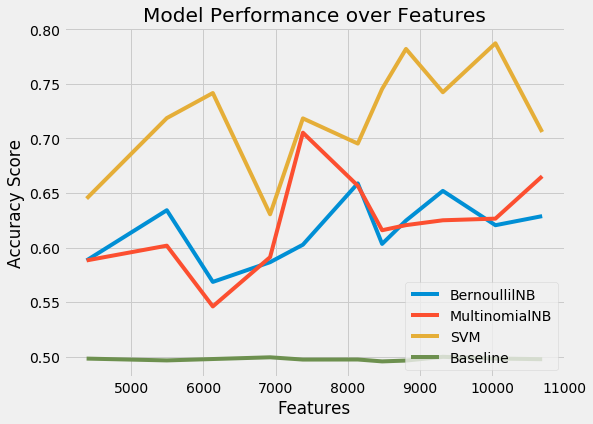

In [9]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.plot(BNB.Features, BNB.Score, label='BernoullilNB')
plt.plot(MNB.Features, MNB.Score, label='MultinomialNB')
plt.plot(SVM.Features, SVM.Score, label='SVM')
plt.plot(SVM.Features, (SVM.True_Baseline/100), label='Baseline')
plt.title('Model Performance over Features')
plt.xlabel('Features')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()

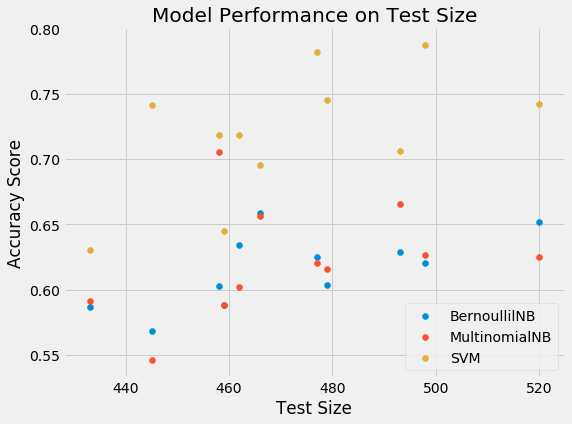

In [23]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.scatter(BNB.Test_rows, BNB.Score, label='BernoullilNB')
plt.scatter(MNB.Test_rows, MNB.Score, label='MultinomialNB')
plt.scatter(SVM.Test_rows, SVM.Score, label='SVM')
plt.title('Model Performance on Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()

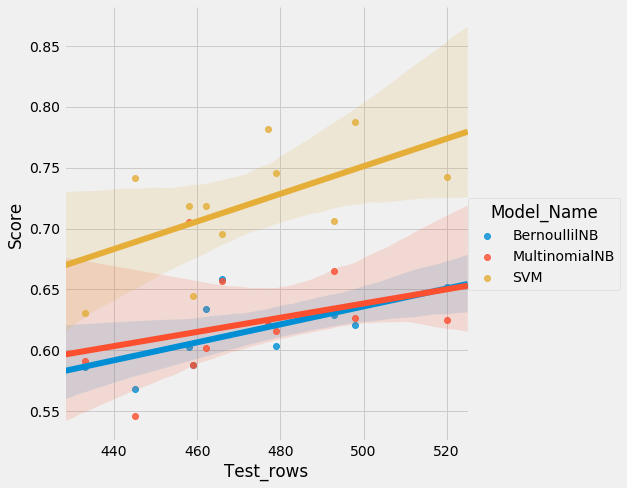

In [26]:
sns.lmplot(x="Test_rows", y='Score', hue='Model_Name', size=7, data=top_scores)

## Conclusions ##

The SVM performed better than both Naive Bayes, almost every time. After 13 iterations, 7000 data points and 11000 features, my machine was no longer able to process the model fits. What this tells me is that the problem of "Big Data" can happen a lot sooner than I expect it too. In addition, I found that after pickeling my best models, they too became huge files. Just puting the SVM model into RAM to test the model will take up at leat 2 GB alone! What this tells me is that while a procesor can "solve" any problem given enough time, the memory limitations will limit you more than the time it takes to process.

Text(0,0.5,u'Accuracy Score')

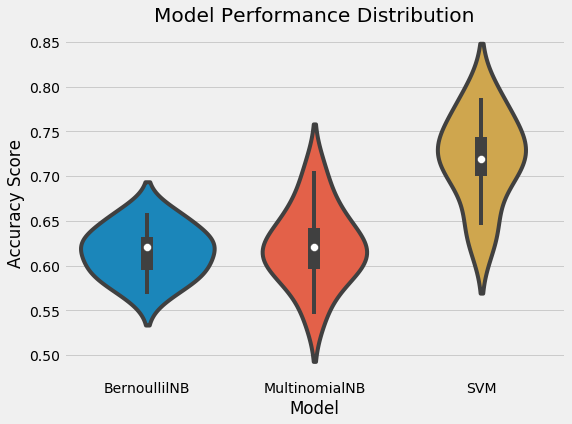

In [11]:
sns.violinplot(x=top_scores['Model_Name'], y=top_scores['Score'])
plt.title('Model Performance Distribution')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')